In [1]:
%store -r France
%store -r Colombia
%store -r US
%store -r Italy
%store -r Japan
%store -r Germany

In [2]:
%pylab
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
for i in range(1,len(US["Coffee Volume"])+1):
      US["Coffee Volume"][i]=re.sub("[^\d\.]", "", US["Coffee Volume"][i])
      US["Energy Drink Volume"][i]=re.sub("[^\d\.]", "", US["Energy Drink Volume"][i])
      Japan["Energy Drink Volume"][i]=re.sub("[^\d\.]", "", Japan["Energy Drink Volume"][i])

<ipython-input-3-14d69ee9239b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US["Coffee Volume"][i]=re.sub("[^\d\.]", "", US["Coffee Volume"][i])
<ipython-input-3-14d69ee9239b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US["Energy Drink Volume"][i]=re.sub("[^\d\.]", "", US["Energy Drink Volume"][i])
<ipython-input-3-14d69ee9239b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Japan["Energy Drink Volume"][i]=re.sub("[^\d\.]",

In [9]:
class Pred:
    def __init__(self,country,time):
        #clean and seperate data into train and test
        import seaborn as sns
        import statsmodels.api as sm
        self.country=country
        self.time=time
        self.train = self.country.iloc[:self.time,:]
        self.test = self.country.iloc[self.time:,:]
        self.data = self.country.drop(columns=["Country"])
        self.Predict = {}
        self.Predict2 = {}
        #change data from object to float
        for i in self.data.keys():
            self.train[i]=pd.to_numeric(self.train[i])
            self.test[i]=pd.to_numeric(self.test[i])
    def GDP(self):
        #Predict 2019 and 2020 GDP by other features
        self.Predict={}
        predictor = ["Energy Drink Revenue","Energy Drink Volume","Coffee Revenue","Coffee Volume"]
        for i in predictor:
            constant = sm.add_constant(self.train[i])
            model = sm.OLS(self.train["GDP"],constant)
            result1 = model.fit()
            new_constant=sm.add_constant(self.test[i])
            self.Predict["Predict GDP by "+i]=list(result1.predict(new_constant).values)
        self.Predict=pd.DataFrame(self.Predict)
        self.Predict["Real GDP"]=list(self.test["GDP"].values)
        self.Predict["time"]=["2019","2020"]
        self.Predict=self.Predict.set_index("time")
        return self.Predict
    def Work_Hours(self):
        #Predict 2019 and 2020 Work hours by other features
        self.Predict2 = {}
        predictor = ["Energy Drink Revenue","Energy Drink Volume","Coffee Revenue","Coffee Volume"]
        for i in predictor:
            constant = sm.add_constant(self.train[i])
            model = sm.OLS(self.train["Hours Worked"],constant)
            result = model.fit()
            new_constant=sm.add_constant(self.test[i])
            self.Predict2["Predict Hours Worked by "+i]=list(result.predict(new_constant).values)
        self.Predict2=pd.DataFrame(self.Predict2)
        self.Predict2["Real Hours Worked"]=list(self.test["Hours Worked"].values)
        self.Predict2["time"]=["2019","2020"]
        self.Predict2=self.Predict2.set_index("time")
        return self.Predict2
    def summary(self,y,x):
        #if you want to know any result summary by any values, use this funcion. x and y should be the column's names,like GDP or Coffee Revenue.
        self.y = y
        self.x = x
        constant = sm.add_constant(self.train[self.x])
        model = sm.OLS(self.train[self.y],constant)
        result = model.fit()
        return result.summary()
    
    def corr_GDP (self):
        #correlation of GDP with its predictors
        ax = plt.axes()
        sns.heatmap(self.Predict.corr(), ax = ax)

        ax.set_title(self.country["Country"][1])
        return plt.show()
    def corr_Work_Hours(self):
        #correlation of work hours with its predicotrs
        ax = plt.axes()
        sns.heatmap(self.Predict2.corr(), ax = ax)

        ax.set_title(self.country["Country"][1])
        return plt.show()
    def residual_Work_Hours(self,predictor):
        self.predictor=predictor
        constant = sm.add_constant(self.train[predictor])
        model = sm.OLS(self.train["Hours Worked"],constant)
        result = model.fit()
        fig = plt.figure(figsize=(12,8))
        fig = sm.graphics.plot_regress_exog(result, predictor, fig=fig) 
        return fig

In [11]:
C = Pred(Colombia,4)
U = Pred(US,5)
I = Pred(Italy,5)
F = Pred(France,5)
J = Pred(Japan,5)
G =Pred(Germany,5)
countries=[C,U,I,F,J,G]

<ipython-input-9-8c9228bf549e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.train[i]=pd.to_numeric(self.train[i])
<ipython-input-9-8c9228bf549e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.test[i]=pd.to_numeric(self.test[i])
<ipython-input-9-8c9228bf549e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

      Predict GDP by Energy Drink Revenue  Predict GDP by Energy Drink Volume  \
time                                                                            
2019                         2.947826e+11                        3.054685e+11   
2020                         2.956419e+11                        2.969674e+11   

      Predict GDP by Coffee Revenue  Predict GDP by Coffee Volume  \
time                                                                
2019                   2.857654e+11                  3.130265e+11   
2020                   3.123363e+11                  3.059910e+11   

          Real GDP  
time                
2019  3.118837e+11  
2020  3.341982e+11  


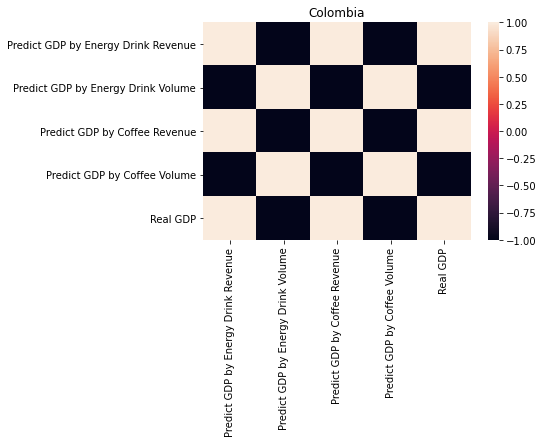

None
      Predict GDP by Energy Drink Revenue  Predict GDP by Energy Drink Volume  \
time                                                                            
2019                         2.078360e+13                        2.044892e+13   
2020                         2.143843e+13                        2.080572e+13   

      Predict GDP by Coffee Revenue  Predict GDP by Coffee Volume  \
time                                                                
2019                   2.148720e+13                  2.187148e+13   
2020                   2.238167e+13                  2.267280e+13   

          Real GDP  
time                
2019  2.137257e+13  
2020  2.089374e+13  


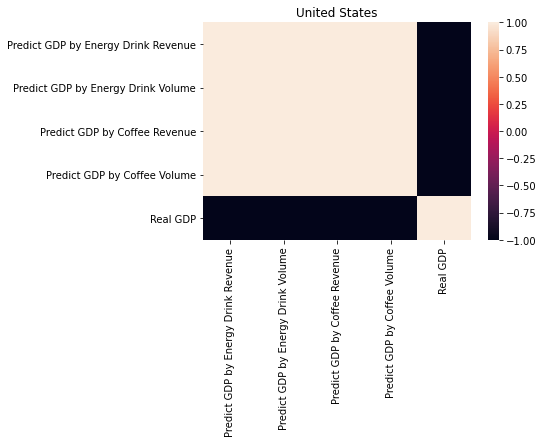

None
      Predict GDP by Energy Drink Revenue  Predict GDP by Energy Drink Volume  \
time                                                                            
2019                         1.985757e+12                        1.970839e+12   
2020                         1.991649e+12                        1.995621e+12   

      Predict GDP by Coffee Revenue  Predict GDP by Coffee Volume  \
time                                                                
2019                   2.010941e+12                  2.016427e+12   
2020                   1.998519e+12                  2.021239e+12   

          Real GDP  
time                
2019  2.011286e+12  
2020  1.892574e+12  


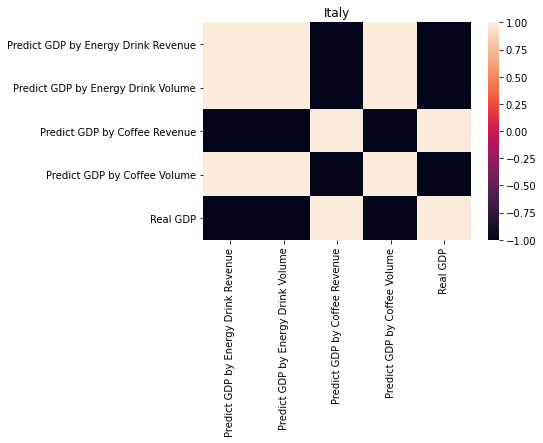

None
      Predict GDP by Energy Drink Revenue  Predict GDP by Energy Drink Volume  \
time                                                                            
2019                         2.767035e+12                        2.780083e+12   
2020                         2.817776e+12                        2.910341e+12   

      Predict GDP by Coffee Revenue  Predict GDP by Coffee Volume  \
time                                                                
2019                   2.635407e+12                  2.862874e+12   
2020                   2.637906e+12                  2.882478e+12   

          Real GDP  
time                
2019  2.728870e+12  
2020  2.630318e+12  


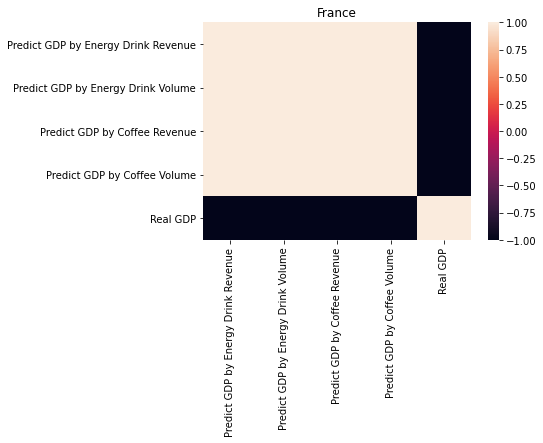

None
      Predict GDP by Energy Drink Revenue  Predict GDP by Energy Drink Volume  \
time                                                                            
2019                         4.906984e+12                        5.079204e+12   
2020                         4.917285e+12                        5.160758e+12   

      Predict GDP by Coffee Revenue  Predict GDP by Coffee Volume  \
time                                                                
2019                   4.899417e+12                  5.044872e+12   
2020                   4.914527e+12                  5.079825e+12   

          Real GDP  
time                
2019  5.123318e+12  
2020  5.040108e+12  


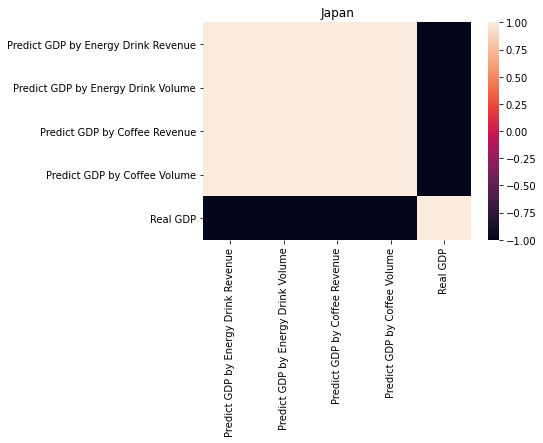

None
      Predict GDP by Energy Drink Revenue  Predict GDP by Energy Drink Volume  \
time                                                                            
2019                         4.098227e+12                        3.920450e+12   
2020                         4.376506e+12                        4.148132e+12   

      Predict GDP by Coffee Revenue  Predict GDP by Coffee Volume  \
time                                                                
2019                   3.684514e+12                  3.717447e+12   
2020                   3.680569e+12                  3.698917e+12   

          Real GDP  
time                
2019  3.888327e+12  
2020  3.846414e+12  


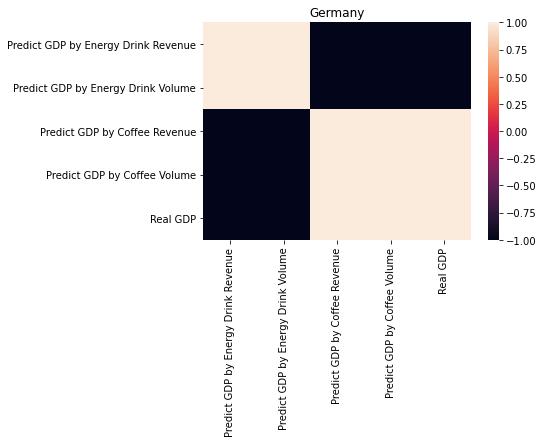

None


In [39]:
for i in countries:
    print(i.GDP())
    print(i.corr_GDP())

      Predict Hours Worked by Energy Drink Revenue  \
time                                                 
2019                                   2340.516950   
2020                                   2340.978994   

      Predict Hours Worked by Energy Drink Volume  \
time                                                
2019                                  2341.150043   
2020                                  2333.615019   

      Predict Hours Worked by Coffee Revenue  \
time                                           
2019                             2360.598455   
2020                             2355.610653   

      Predict Hours Worked by Coffee Volume  Real Hours Worked  
time                                                            
2019                            2344.965011        2352.529918  
2020                            2335.873432        2204.417645  


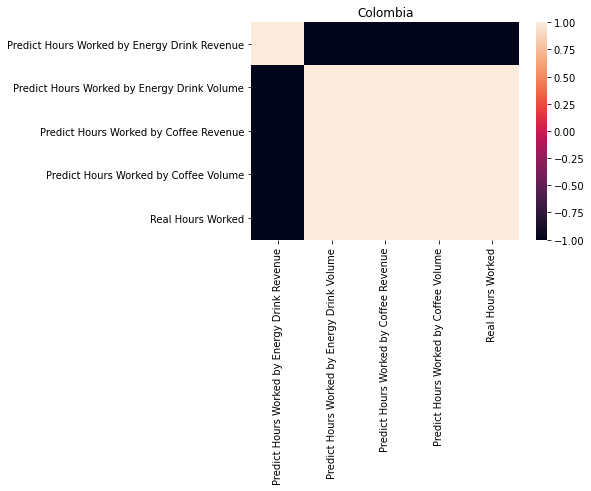

None
      Predict Hours Worked by Energy Drink Revenue  \
time                                                 
2019                                   1784.438182   
2020                                   1783.764549   

      Predict Hours Worked by Energy Drink Volume  \
time                                                
2019                                  1784.557520   
2020                                  1784.138932   

      Predict Hours Worked by Coffee Revenue  \
time                                           
2019                             1784.107347   
2020                             1783.322636   

      Predict Hours Worked by Coffee Volume  Real Hours Worked  
time                                                            
2019                            1784.084307           1783.547  
2020                            1783.465781           1783.815  


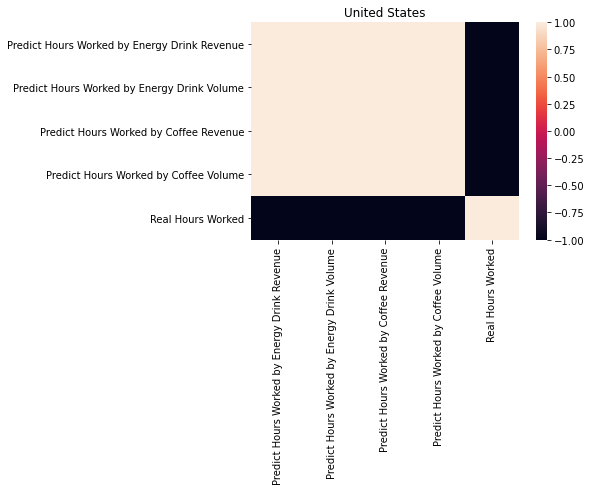

None
      Predict Hours Worked by Energy Drink Revenue  \
time                                                 
2019                                   1718.826815   
2020                                   1718.522965   

      Predict Hours Worked by Energy Drink Volume  \
time                                                
2019                                  1719.540461   
2020                                  1718.354162   

      Predict Hours Worked by Coffee Revenue  \
time                                           
2019                             1717.168351   
2020                             1717.987350   

      Predict Hours Worked by Coffee Volume  Real Hours Worked  
time                                                            
2019                            1720.866818             1710.2  
2020                            1721.189355             1553.6  


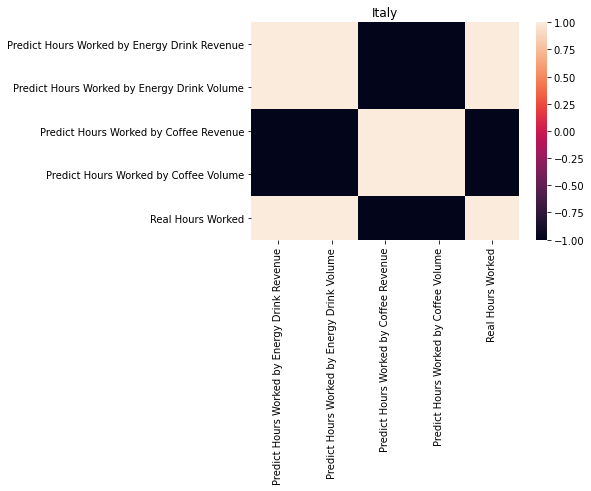

None
      Predict Hours Worked by Energy Drink Revenue  \
time                                                 
2019                                   1421.396376   
2020                                   1421.011069   

      Predict Hours Worked by Energy Drink Volume  \
time                                                
2019                                  1422.727029   
2020                                  1422.985812   

      Predict Hours Worked by Coffee Revenue  \
time                                           
2019                             1422.591514   
2020                             1422.679676   

      Predict Hours Worked by Coffee Volume  Real Hours Worked  
time                                                            
2019                            1421.015379        1428.333085  
2020                            1420.895810        1325.968634  


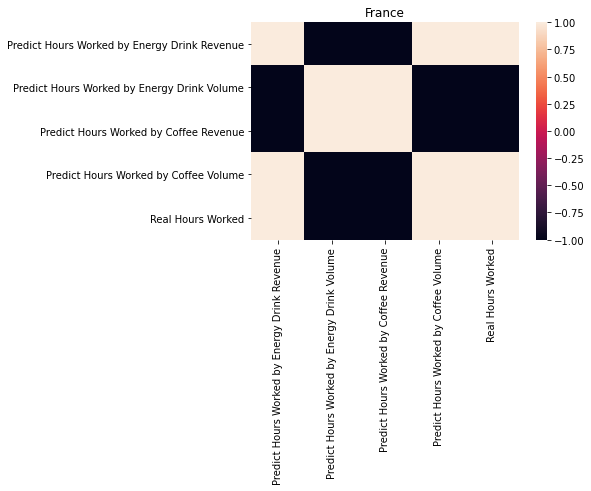

None
      Predict Hours Worked by Energy Drink Revenue  \
time                                                 
2019                                   1720.612851   
2020                                   1719.588773   

      Predict Hours Worked by Energy Drink Volume  \
time                                                
2019                                  1700.396551   
2020                                  1691.122205   

      Predict Hours Worked by Coffee Revenue  \
time                                           
2019                             1717.007965   
2020                             1713.705086   

      Predict Hours Worked by Coffee Volume  Real Hours Worked  
time                                                            
2019                            1703.788667             1669.0  
2020                            1699.715336             1621.0  


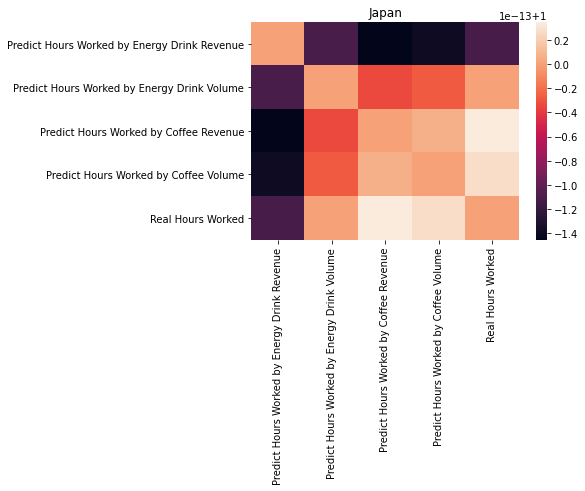

None
      Predict Hours Worked by Energy Drink Revenue  \
time                                                 
2019                                   1327.077944   
2020                                   1323.132061   

      Predict Hours Worked by Energy Drink Volume  \
time                                                
2019                                  1327.373126   
2020                                  1322.063785   

      Predict Hours Worked by Coffee Revenue  \
time                                           
2019                             1334.710470   
2020                             1333.847131   

      Predict Hours Worked by Coffee Volume  Real Hours Worked  
time                                                            
2019                            1334.313059             1328.5  
2020                            1333.736122             1284.4  


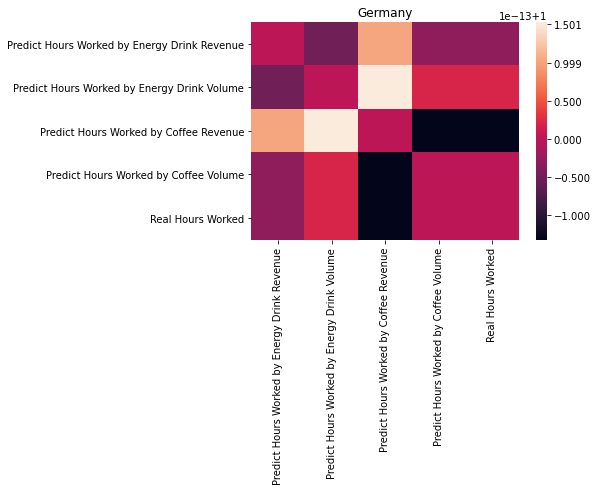

None


In [40]:
for i in countries:
    print(i.Work_Hours())
    print(i.corr_Work_Hours())

In [50]:
for i in countries:
    print(i.summary("GDP","Coffee Revenue"))

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                 -0.046
Method:                 Least Squares   F-statistic:                    0.8669
Date:                Sat, 03 Dec 2022   Prob (F-statistic):              0.450
Time:                        00:19:30   Log-Likelihood:                -102.42
No. Observations:                   4   AIC:                             208.8
Df Residuals:                       2   BIC:                             207.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           9.054e+10   2.48e+11      0.

/home/jiangy76/.local/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/home/jiangy76/.local/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/home/jiangy76/.local/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/home/jiangy76/.local/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [51]:
for i in countries:
    print(i.summary("GDP","Energy Drink Revenue"))

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     1.257
Date:                Sat, 03 Dec 2022   Prob (F-statistic):              0.379
Time:                        00:20:10   Log-Likelihood:                -102.16
No. Observations:                   4   AIC:                             208.3
Df Residuals:                       2   BIC:                             207.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.084e+11 

/home/jiangy76/.local/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/home/jiangy76/.local/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/home/jiangy76/.local/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/home/jiangy76/.local/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


eval_env: 1


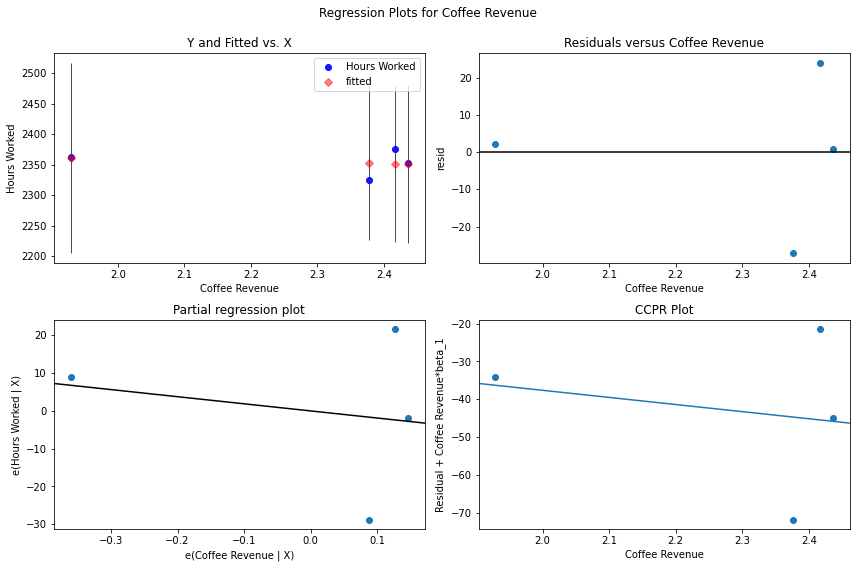

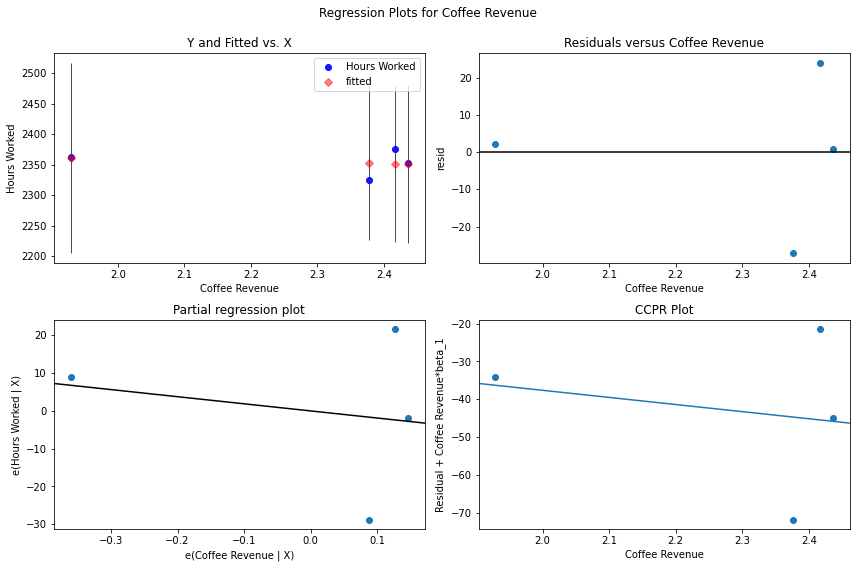

In [12]:
C.residual_Work_Hours("Coffee Revenue")